learn to implement and experiment with various data augmentation techniques using Keras in this lab. 

#### Learning objectives 

By the end of this lab, you will: 

- Implement various data augmentation techniques using Keras 
- Implement feature-wise and sample-wise normalization on the data set. 
- Define and apply a custom augmentation function that adds random noise to images. 
- Display the augmented images to understand the effect of different augmentation techniques.  

Step-by-step instructions
Step 1: Setup the environment
First, you need to import the necessary libraries and load the data set as follows:

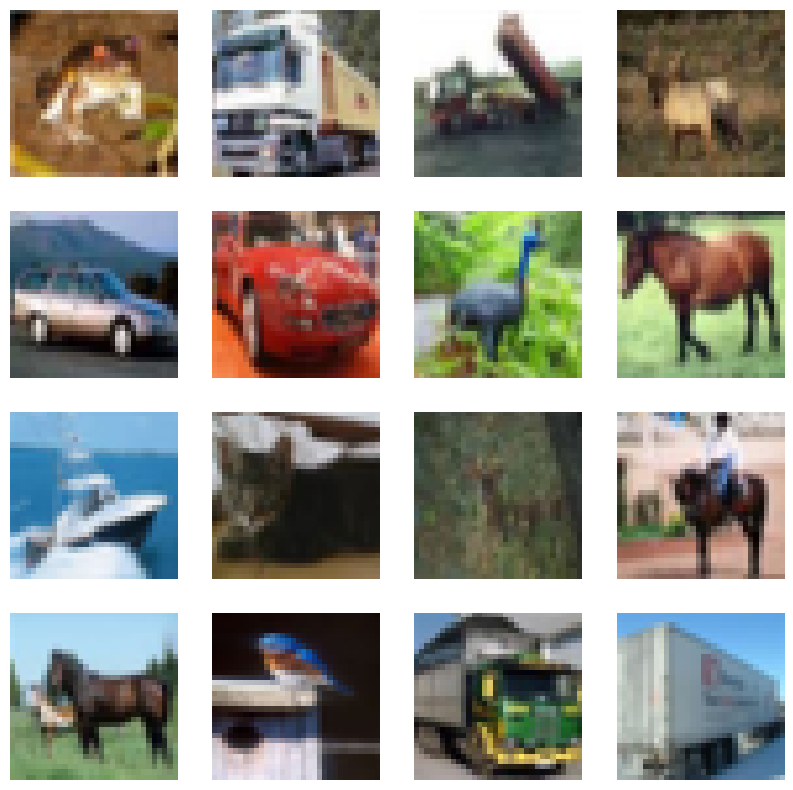

In [1]:
# matplotlib 3.10.1
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
# DEPRECATED.
# tf.keras.preprocessing.image.ImageDataGenerator(
#     featurewise_center=False,
#     samplewise_center=False,
#     featurewise_std_normalization=False,
#     samplewise_std_normalization=False,
#     zca_whitening=False,
#     zca_epsilon=1e-06,
#     rotation_range=0,
#     width_shift_range=0.0,
#     height_shift_range=0.0,
#     brightness_range=None,
#     shear_range=0.0,
#     zoom_range=0.0,
#     channel_shift_range=0.0,
#     fill_mode='nearest',
#     cval=0.0,
#     horizontal_flip=False,
#     vertical_flip=False,
#     rescale=None,
#     preprocessing_function=None,
#     data_format=None,
#     validation_split=0.0,
#     interpolation_order=1,
#     dtype=None
# )

# from tensorflow import ImageDataGenerator

# Load CIFAR-10 dataset for training images
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize the pixel values for augmentation
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Display a sample of the training images
plt.figure(figsize = (10, 10))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(x_train[i])
    plt.axis('off')
plt.show()

In [2]:
from PIL import Image, ImageDraw

# Create an blank white image
image = Image.new('RGB', (224, 224), color = (255, 255, 255))

# Draw a red square
draw = ImageDraw.Draw(image)
# what the parameter [(50, 50), (174, 174)] means?
# I don't see the api in the source code
# Generated by Github Copilot:
# it means the left-top corner is (50, 50) and the right-bottom corner is (174, 174)
# so the square's width is 174 - 50 = 124
# the square's height is 174 - 50 = 124
# so the square's area is 124 * 124 = 15376
# the square's color is red
# so the square's area is 15376 red
# the square's color is white
# and the image's area is 224 * 224 = 50176
draw.rectangle([(50, 50), (174, 174)], fill = (255, 0, 0))

# Save the image
image.save('sample.jpg')

In [3]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
# Load a sample image
img_path = 'sample.jpg'

img_path = load_img(img_path)
x = img_to_array(img_path)
x = np.expand_dims(x, axis = 0)

Step 2: Basic data augmentation
Apply basic augmentations such as rotation, width shift, height shift, shear, zoom, and horizontal flip using the ImageDataGenerator as follows:

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.1288998..1.0813211].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.18156095..1.0947279].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.008152705..0.7855882].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.09334007..1.0519288].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.10779446..1.0479312].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.11498573..1.0812166].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.12183

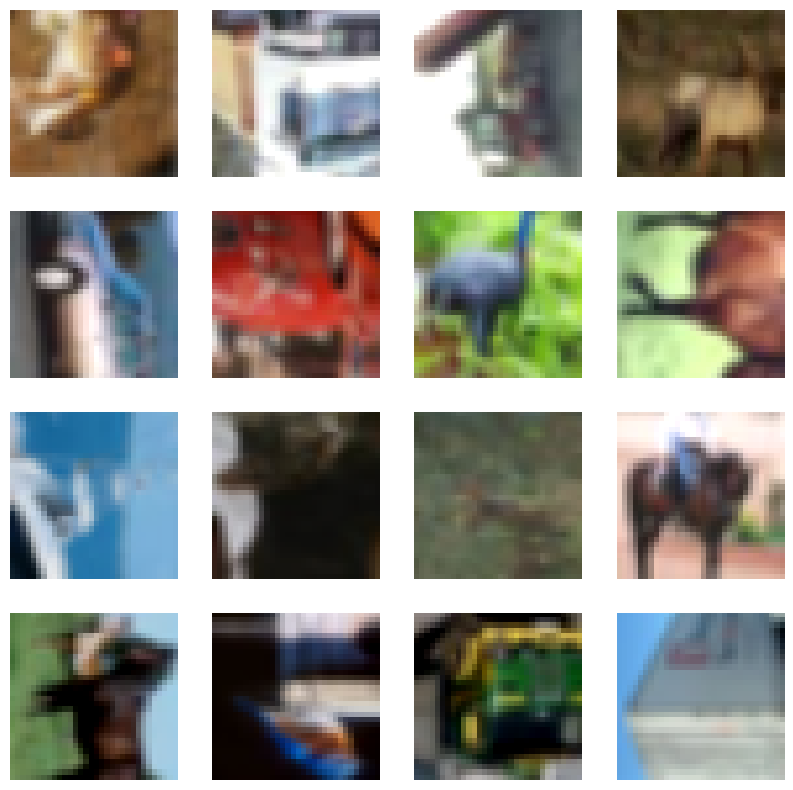

In [ ]:
# Create an instance of the ImageDataGenerator
# datagen = ImageDataGenerator(
#     rotation_range=40,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     fill_mode='nearest'
# )
# -------------------------
# Cuz ImageDataGenerator is deprecated, so I use tf.data: Build TensorFlow input pipelines 
# The augment function applies random horizontal and vertical flips, random brightness and contrast adjustments, random rotations, and random cropping followed by resizing to the original size.
# The train_dataset is created from the training data and augmented using the augment function.
# The augmented images are displayed in a grid.

def augment(image, label):
    #  """Randomly flip an image horizontally (left to right).
    image = tf.image.random_flip_left_right(image)
    #   """Randomly flips an image vertically (upside down).
    image = tf.image.random_flip_up_down(image)
    #   """Adjust the brightness of images by a random factor.
    image = tf.image.random_brightness(image, max_delta = 0.1)
    #   """Adjust the contrast of an image or images by a random factor.
    image = tf.image.random_contrast(image, lower = 0.9, upper = 1.1)
    #   """Rotate image(s) by 90 degrees.
    image = tf.image.rot90(image, k = tf.random.uniform(shape = [], minval = 0, maxval = 4, dtype = tf.int32))
    #   """Randomly crops a tensor to a given size.
    image = tf.image.random_crop(image, size = [24, 24, 3])
    # """Resize `images` to `size` using the specified `method`.
    image = tf.image.resize(image, size = [32, 32])
    return image, label

# Create a tf.data.Dataset object
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = train_dataset.map(augment, num_parallel_calls=tf.data.AUTOTUNE)
train_dataset = train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

# Display a sample of the augmented training images
plt.figure(figsize = (10, 10))
for images, labels in train_dataset.take(1):
    for i in range(16):
        # Add an Axes to the current figure or retrieve an existing Axes.

        #     This is a wrapper of `.Figure.add_subplot` which provides additional
        #     behavior when working with the implicit API (see the notes section).
        plt.subplot(4, 4, i + 1)
        plt.imshow(images[i])
        plt.axis('off')
plt.show()

Step 3: Feature-wise and sample-wise normalization
Implement feature-wise and sample-wise normalization on the data set as follows:

2025-03-13 20:36:15.917419: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


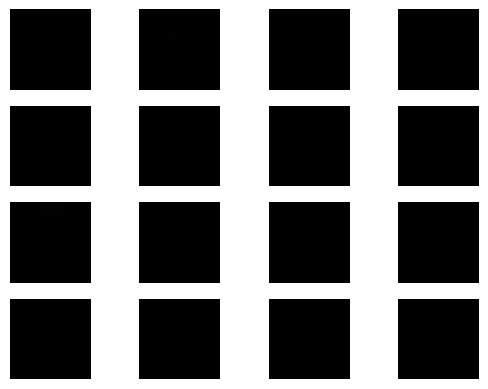

In [ ]:
for images, labels in train_dataset.take(1):
    for i in range(16):
        plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.axis('off')
plt.show()

Step 4: Custom data augmentation function
Next, you define and apply a custom augmentation function that adds random noise to images as follows:

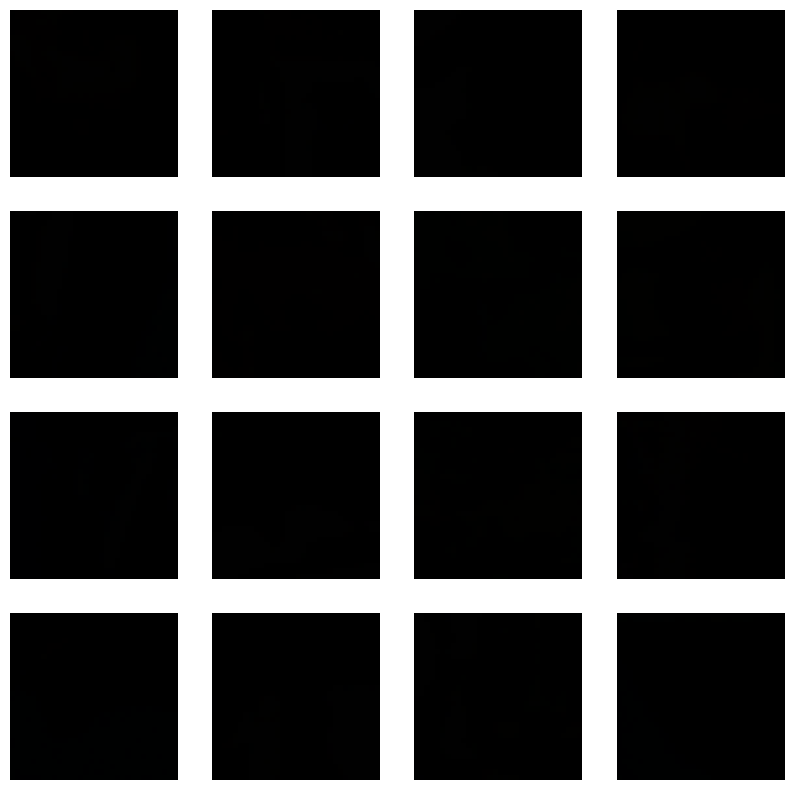

In [12]:
# Define a custom data augmentation function
def normalize(image, label):
#   """Linearly scales each image in `image` to have mean 0 and variance 1.

#   For each 3-D image `x` in `image`, computes `(x - mean) / adjusted_stddev`,
#   where

#   - `mean` is the average of all values in `x`
#   - `adjusted_stddev = max(stddev, 1.0/sqrt(N))` is capped away from 0 to
#     protect against division by 0 when handling uniform images
#     - `N` is the number of elements in `x`
#     - `stddev` is the standard deviation of all values in `x`
    image = tf.image.per_image_standardization(image)
    return image, label

def add_random_noise(image, label):
    noise = np.random.normal(0, 0.1, image.shape)
    image = image + noise
    image = tf.clip_by_value(image, 0.0, 1.0) # Ensure pixel values are between 0 and 1
    return image, label

# Create a tf.data.Dataset object
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = train_dataset.map(augment, num_parallel_calls = tf.data.AUTOTUNE)
train_dataset = train_dataset.map(normalize, num_parallel_calls = tf.data.AUTOTUNE)
train_dataset = train_dataset.map(add_random_noise, num_parallel_calls = tf.data.AUTOTUNE)
train_dataset = train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

# Display a sample of the augmented and normalized training images with noise
plt.figure(figsize = (10, 10))
for images, labels in train_dataset.take(1):
    for i in range(16):
        plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.axis('off')
plt.show()





Objective: Experiment with different augmentation techniques and visualize their effects.